## CLean the data Planting material 

In [1]:
import pandas as pd

# Load the data from the uploaded file
file_path = 'https://raw.githubusercontent.com/jrobledob/R2M_Colombia_banana_and_plantain/main/Data/DATA_MAP_Network_of_Planting_Material_2023_12_08.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,Unnamed: 0,Amazonas,Antioquia,Arauca,Atlántico,Bolívar,Boyacá,Caldas,Caquetá,Casanare,...,Sucre,Tolima,Valle del Cauca,Vaupés,Vichada,Venezuela,Honduras,Costa Rica,Rep. Dominicana,Ecuador
0,Amazonas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Antioquia,0,"BC, BN, PN",0,0,PN,0,PN,0,0,...,PN,0,"BN, BC",0,0,0,0,0,0,0
2,Arauca,0,0,"PN, PC",0,0,0,0,0,"PN, PC",...,0,0,0,0,PN,PN,0,0,0,0
3,Atlántico,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bolívar,0,0,0,0,"PN, PC",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Transform the data from wide format to long format
long_format_data = data.melt(id_vars=['Unnamed: 0'], var_name='To', value_name='Value')
long_format_data.rename(columns={'Unnamed: 0': 'From'}, inplace=True)

# Filter out rows where Value is 0, as they do not represent any interaction
long_format_data = long_format_data[long_format_data['Value'] != 0]

# Display the first few rows of the transformed data
long_format_data.head()

,From,To,Value
0,Amazonas,Amazonas,0
1,Antioquia,Amazonas,0
2,Arauca,Amazonas,0
3,Atlántico,Amazonas,0
4,Bolívar,Amazonas,0


In [3]:
# Remove rows where the 'Value' column is 0
filtered_data = long_format_data[long_format_data['Value'] != '0']

# Display the first few rows of the filtered data
filtered_data.head()
#filtered_data.to_csv("C:/Users/jrobl/data.csv")

,From,To,Value
16,Huila,Amazonas,PN
38,Antioquia,Antioquia,"BC, BN, PN"
48,Chocó,Antioquia,PN
49,Córdoba,Antioquia,PN
50,Cundinamarca,Antioquia,BC


In [4]:
# Splitting the 'Value' column by commas and expanding into separate rows
# This will duplicate the 'From' and 'To' columns for each value in 'Value' column
expanded_data = filtered_data.assign(Value=filtered_data['Value'].str.split(', ')).explode('Value')

# Display the first few rows of the expanded data
expanded_data.head()
#expanded_data.to_csv("C:/Users/jrobl/data.csv")

,From,To,Value
16,Huila,Amazonas,PN
38,Antioquia,Antioquia,BC
38,Antioquia,Antioquia,BN
38,Antioquia,Antioquia,PN
48,Chocó,Antioquia,PN


In [5]:
# Load your data into DataFrames
percentages_data_set = pd.read_csv('https://raw.githubusercontent.com/jrobledob/R2M_Colombia_banana_and_plantain/main/Data/SUP_Percentage_of_informal_planting_material_by_department.csv')
percentages_data_set.head()


# Merge the DataFrames based on matching values in "From" and "KE.expert.in"
merged_data = expanded_data.merge(percentages_data_set, left_on='From', right_on='EKE.expert.in', how='left')

# Update the "percentage_informal_y" column where "Value" contains 'C'
merged_data.loc[merged_data['Value'].str.contains('C'), 'percentage_informal'] = 100 - merged_data['percentage_informal']


merged_data.head()

,From,To,Value,EKE.expert.in,id_depto,average_weighted,cat_weighted,percentage_informal
0,Huila,Amazonas,PN,Huila,41.0,10.000000,1 to 9,90.0
1,Antioquia,Antioquia,BC,Antioquia,5.0,5.137931,6 to 4,60.0
2,Antioquia,Antioquia,BN,Antioquia,5.0,5.137931,6 to 4,40.0
3,Antioquia,Antioquia,PN,Antioquia,5.0,5.137931,6 to 4,40.0
4,Chocó,Antioquia,PN,Chocó,27.0,9.000000,2 to 8,80.0


In [6]:
# Load your data into DataFrames
question_12 = pd.read_csv('https://raw.githubusercontent.com/jrobledob/R2M_Colombia_banana_and_plantain/main/Data/SUP_Proportion_of_movement_of_planting_materials_by_departments.csv')

# Merge the DataFrames based on matching values in "From" and "To" columns
final_merged_data = pd.merge(merged_data, question_12, on=['From', 'To'], how='left')

# Print the resulting DataFrame
final_merged_data.head(200)


,From,To,Value_x,EKE.expert.in,id_depto,average_weighted,cat_weighted,percentage_informal,Value_y,freq_unique
0,Huila,Amazonas,PN,Huila,41.0,10.000000,1 to 9,90.0,NaN,NaN
1,Antioquia,Antioquia,BC,Antioquia,5.0,5.137931,6 to 4,60.0,BN,0.836
2,Antioquia,Antioquia,BC,Antioquia,5.0,5.137931,6 to 4,60.0,BC,0.836
3,Antioquia,Antioquia,BC,Antioquia,5.0,5.137931,6 to 4,60.0,PN,1.000
4,Antioquia,Antioquia,BC,Antioquia,5.0,5.137931,6 to 4,60.0,PC,1.000
...,...,...,...,...,...,...,...,...,...,...
195,Ecuador,Nariño,PN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,Ecuador,Nariño,BN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,Arauca,Norte de Santander,PN,Arauca,81.0,10.000000,1 to 9,90.0,NaN,NaN
198,Norte de Santander,Norte de Santander,PN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Network Planting Material

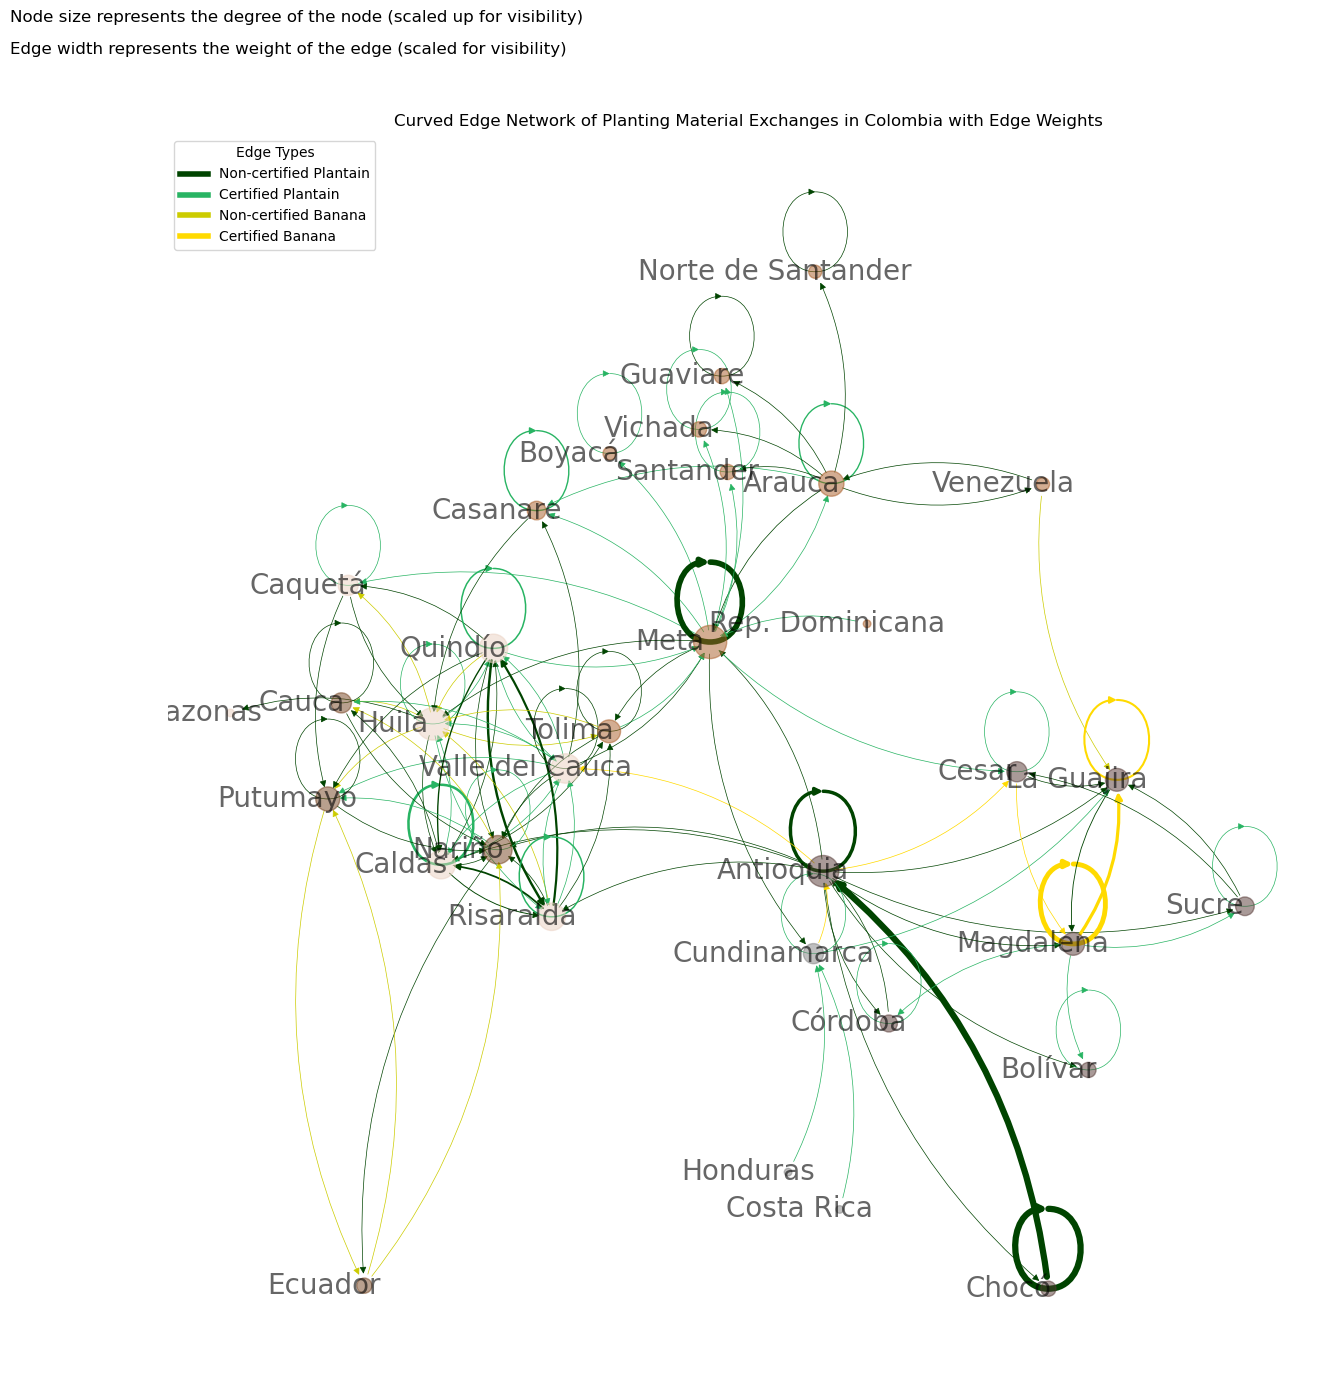

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as nx_comm
import numpy as np
from matplotlib.lines import Line2D

final_merged_data['Value_x'] = final_merged_data['Value_x'].replace({
    'PN': 'Non-certified Plantain',
    'PC': 'Certified Plantain',
    'BN': 'Non-certified Banana',
    'BC': 'Certified Banana'
})


# Define edge colors with updated labels
edge_color_map = {
    'Non-certified Plantain': "#004400",
    'Certified Plantain': "#28B463",
    'Non-certified Banana': "#CCCC00",
    'Certified Banana': "#FFDA00"
}

# Create the network using final_merged_data instead of expanded_data
binary_network = nx.DiGraph()

# Add nodes and edges to the graph with the correct attributes and weights
for index, row in final_merged_data.iterrows():
    # Calculate the weight for each edge
    edge_weight =(row['percentage_informal'] * row['freq_unique']) + 10
    # Check if edge_weight is NaN and assign a small value if true
    if np.isnan(edge_weight):
        edge_weight = 10  # Assign a default small value to NaN weights
    binary_network.add_edge(row['From'], row['To'], value=row['Value_x'], weight=edge_weight)

# Calculate the layout after all nodes and edges have been added
pos_kamada_kawai = nx.kamada_kawai_layout(binary_network)
if 'Costa Rica' in pos_kamada_kawai:
    pos_kamada_kawai['Costa Rica'] = (pos_kamada_kawai['Costa Rica'][0] + 0.09, pos_kamada_kawai['Costa Rica'][1] - 0.07)
if 'Santander' in pos_kamada_kawai:
    pos_kamada_kawai['Santander'] = (pos_kamada_kawai['Santander'][0] + 0.05, pos_kamada_kawai['Santander'][1] - 0.08)
if 'Boyacá' in pos_kamada_kawai:
    pos_kamada_kawai['Boyacá'] = (pos_kamada_kawai['Boyacá'][0] - 0.09, pos_kamada_kawai['Boyacá'][1] - 0.05)
if 'Guaviare' in pos_kamada_kawai:
    pos_kamada_kawai['Guaviare'] = (pos_kamada_kawai['Guaviare'][0] +0.04, pos_kamada_kawai['Guaviare'][1] + 0.1)
if 'Ecuador' in pos_kamada_kawai:
    pos_kamada_kawai['Ecuador'] = (pos_kamada_kawai['Ecuador'][0] +0.09, pos_kamada_kawai['Ecuador'][1] - 0.6)



# Use NetworkX's built-in algorithms for community detection
communities = nx_comm.greedy_modularity_communities(binary_network)

# Create a mapping of node to community index
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# Draw the network with curved edges
fig, ax = plt.subplots(figsize=(15, 16))

# Calculate node sizes based on degrees and make them 10 times bigger
node_degrees = dict(binary_network.degree())
node_sizes = [v * 100 for v in node_degrees.values()]  # Scale node size by degree





# Community colors as specified
community_colors_specified = ['#A95C26', '#543733', '#EAD0C1', '#74421F', 'grey', '#9DBF9E']
# Assigning colors to nodes based on their community
community_colors = [community_colors_specified[community_map[node] % len(community_colors_specified)] for node in binary_network.nodes()]


# Optionally, reduce the node sizes slightly if they are too large
scaled_node_sizes = [size * 0.3 for size in node_sizes]  # Scale down if needed
nx.draw_networkx_nodes(binary_network, pos=pos_kamada_kawai, node_size=scaled_node_sizes, node_color=community_colors, ax=ax, alpha=0.5)

# Draw curved edges with weights
for u, v in binary_network.edges():
    # Adjust the edge width based on the weight
    edge_width = binary_network[u][v]['weight'] * 0.05  # Scale the weight for visualization purposes
    # Adjust the rad value for better visibility of arrows
    nx.draw_networkx_edges(binary_network, pos=pos_kamada_kawai, edgelist=[(u, v)], width=edge_width, edge_color=edge_color_map.get(binary_network[u][v]['value'], 'black'), ax=ax, arrows=True, connectionstyle='arc3,rad=0.2')  # Increase rad for more curvature

# Adjust the position of the labels
label_pos = {node: (pos[0] - 0.07, pos[1]) for node, pos in pos_kamada_kawai.items()}
nx.draw_networkx_labels(binary_network, pos=label_pos, ax=ax, font_size=20, alpha= 0.60)



# Create custom legend for edge colors
legend_elements = [Line2D([0], [0], color=color, lw=4, label=label) for label, color in edge_color_map.items()]
ax.legend(handles=legend_elements, title="Edge Types", loc='upper left')


# Annotate for node sizes and edge weights
plt.figtext(0.02, 0.95, "Node size represents the degree of the node (scaled up for visibility)", wrap=True, horizontalalignment='left', fontsize=12)
plt.figtext(0.02, 0.93, "Edge width represents the weight of the edge (scaled for visibility)", wrap=True, horizontalalignment='left', fontsize=12)

plt.title("Curved Edge Network of Planting Material Exchanges in Colombia with Edge Weights")
plt.axis('off')
plt.show()


In [8]:
import pandas as pd

# Assuming community_map is a dictionary mapping node labels to community indices
# and community_colors_specified is a list with colors for each community

# First, create a dictionary that maps nodes to their respective colors
node_color_map = {node: community_colors_specified[community_map[node] % len(community_colors_specified)] for node in binary_network.nodes()}

# Now, convert this dictionary to a pandas DataFrame
node_colors_df = pd.DataFrame(list(node_color_map.items()), columns=['Node Label', 'Color'])

# Display the first few rows to check
print(node_colors_df)

            Node Label    Color
0                Huila  #EAD0C1
1             Amazonas  #EAD0C1
2            Antioquia  #543733
3                Chocó  #543733
4              Córdoba  #543733
5         Cundinamarca     grey
6               Arauca  #A95C26
7                 Meta  #A95C26
8            Venezuela  #A95C26
9              Bolívar  #543733
10           Magdalena  #543733
11              Boyacá  #A95C26
12              Caldas  #EAD0C1
13             Quindío  #EAD0C1
14           Risaralda  #EAD0C1
15     Valle del Cauca  #EAD0C1
16             Caquetá  #EAD0C1
17            Casanare  #A95C26
18               Cauca  #74421F
19              Nariño  #74421F
20               Cesar  #543733
21               Sucre  #543733
22            Honduras     grey
23          Costa Rica     grey
24            Guaviare  #A95C26
25              Tolima  #A95C26
26          La Guajira  #543733
27     Rep. Dominicana  #A95C26
28            Putumayo  #74421F
29             Ecuador  #74421F
30  Nort

In [9]:
# List of Colombian departments and capital districts to keep
colombian_places = ['Antioquia', 'Arauca', 'Atlántico', 'Caldas', 'Cundinamarca', 'La Guajira', 'Valle del Cauca',
                    'Cesar', 'Norte de Santander', 'Meta', 'Bolívar', 'Cauca', 'Huila', 'Magdalena', 'Nariño',
                    'Quindío', 'Risaralda', 'Santander', 'Sucre', 'Tolima', 'Casanare', 'Guainía', 'Boyacá', 'Córdoba',
                    'Chocó', 'Vichada']

# Filter the DataFrame to only include Colombian places
df_filtered = node_colors_df[node_colors_df['Node Label'].isin(colombian_places)]

# Map for correcting the names in df_filtered to match those in the GeoDataFrame
name_corrections = {
    'Antioquia': 'ANTIOQUIA',
    'Arauca': 'ARAUCA',
    'Atlántico': 'ATLÁNTICO',
    'Caldas': 'CALDAS',
    'Cundinamarca': 'CUNDINAMARCA',
    'La Guajira': 'LA GUAJIRA',
    'Valle del Cauca': 'VALLE DEL CAUCA',
    'Cesar': 'CESAR',
    'Norte de Santander': 'NORTE DE SANTANDER',
    'Meta': 'META',
    'Bolívar': 'BOLÍVAR',
    'Cauca': 'CAUCA',
    'Huila': 'HUILA',
    'Magdalena': 'MAGDALENA',
    'Nariño': 'NARIÑO',
    'Quindío': 'QUINDIO',
    'Risaralda': 'RISARALDA',
    'Santander': 'SANTANDER',
    'Sucre': 'SUCRE',
    'Tolima': 'TOLIMA',
    'Casanare': 'CASANARE',
    'Guainía': 'GUAINÍA',
    'Boyacá': 'BOYACÁ',
    'Córdoba': 'CÓRDOBA',
    'Chocó': 'CHOCÓ',
    'Vichada': 'VICHADA'
}

# Apply the corrections to the 'Node Label' column
df_filtered['Node Label'] = df_filtered['Node Label'].map(name_corrections)

# Verify the changes
print(df_filtered)

            Node Label    Color
0                HUILA  #EAD0C1
2            ANTIOQUIA  #543733
3                CHOCÓ  #543733
4              CÓRDOBA  #543733
5         CUNDINAMARCA     grey
6               ARAUCA  #A95C26
7                 META  #A95C26
9              BOLÍVAR  #543733
10           MAGDALENA  #543733
11              BOYACÁ  #A95C26
12              CALDAS  #EAD0C1
13             QUINDIO  #EAD0C1
14           RISARALDA  #EAD0C1
15     VALLE DEL CAUCA  #EAD0C1
17            CASANARE  #A95C26
18               CAUCA  #74421F
19              NARIÑO  #74421F
20               CESAR  #543733
21               SUCRE  #543733
25              TOLIMA  #A95C26
26          LA GUAJIRA  #543733
30  NORTE DE SANTANDER  #A95C26
31           SANTANDER  #A95C26
32             VICHADA  #A95C26


C:\Users\jrobl\AppData\Local\Temp\ipykernel_9176\2616482239.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Node Label'] = df_filtered['Node Label'].map(name_corrections)


In [10]:
# Load the data from the uploaded file
file_path = 'https://raw.githubusercontent.com/jrobledob/R2M_Colombia_banana_and_plantain/main/Data/SUP_question_15_weighted.csv'
question_15 = pd.read_csv(file_path)

# Extracting all elements from "answer_in_english" and separating them by comma
all_elements = question_15['answer_in_english'].str.cat(sep=',').split(',')

# Getting unique elements from the list
unique_elements = set(all_elements)

# Display the unique elements
unique_elements

{'Biological Control',
 'Biosecurity Measures',
 'Chemical Control',
 'Community Participation',
 'Cultural Control',
 'Education and Training',
 'Integrated Pest and Disease Management',
 'Monitoring and Reporting',
 'Physical Control',
 'Regulatory Compliance',
 'Unsure'}

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load your shapefile
gdf = gpd.read_file('MGN_DPTO_POLITICO.shp')

# Assuming df_filtered is already defined and contains corrected names and colors
# Example of df_filtered is provided in your setup

# Merge the GeoDataFrame with df_filtered to get the colors into gdf
gdf_merged = gdf.merge(df_filtered, left_on='DPTO_CNMBR', right_on='Node Label', how='left')

# Replace NaN colors with 'white' for departments not in df_filtered
gdf_merged['Color'] = gdf_merged['Color'].fillna('white')

# Plotting the map with assigned colors and black borders for departments
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf_merged.plot(ax=ax, color=gdf_merged['Color'], edgecolor='black')

plt.show()


ModuleNotFoundError: No module named 'geopandas'

In [12]:

# Initialize a dictionary to hold the count of each unique element in "answer_in_english" by "crop" and "expert_in"
element_count = {element: [] for element in unique_elements}

# Initialize lists to hold counts of expert_ID and the corresponding crop and expert_in values
crop_list = []
expert_in_list = []
expert_id_length_count = []

# Group the data by 'crop' and 'expert_in'
grouped_data = question_15.groupby(['crop', 'expert_in'])

# Iterate over each group
for (crop, expert_in), group in grouped_data:
    # Add the crop and expert_in to their respective lists
    crop_list.append(crop)
    expert_in_list.append(expert_in)

    # Count the length of expert_IDs in this group
    expert_id_length_count.append(len(group['expert_ID']))

    # Count the occurrences of each unique element in 'answer_in_english' for this group
    answers = group['answer_in_english'].str.cat(sep=',').split(',')
    for element in unique_elements:
        element_count[element].append(answers.count(element))

# Create a new dataframe with the counts
count_df = pd.DataFrame({'Crop': crop_list, 'Expert_in': expert_in_list, 'Expert_ID_Count': expert_id_length_count})

# Add the counts of each unique element to the dataframe
for element in unique_elements:
    count_df[element] = element_count[element]

count_df.head(30) 

,Crop,Expert_in,Expert_ID_Count,Physical Control,Regulatory Compliance,Chemical Control,Cultural Control,Education and Training,Biological Control,Integrated Pest and Disease Management,Unsure,Monitoring and Reporting,Community Participation,Biosecurity Measures
0,Banana,Antioquia,50,46,50,50,37,50,48,48,0,48,31,48
1,Banana,Caldas,4,0,0,4,4,0,4,0,0,0,0,0
2,Banana,Cesar,6,0,0,3,0,0,3,3,0,0,0,6
3,Banana,Chocó,5,2,0,5,3,0,0,5,0,0,0,2
4,Banana,Córdoba,2,0,0,2,2,0,0,0,0,0,0,0
5,Banana,Huila,4,0,0,4,4,0,4,0,0,0,0,0
6,Banana,La Guajira,34,12,16,26,22,22,23,34,0,20,13,28
7,Banana,Magdalena,40,16,22,33,16,22,31,34,3,24,18,34
8,Banana,Quindío,4,0,0,4,4,0,4,0,0,0,0,0
9,Banana,Risaralda,4,0,0,4,4,0,4,0,0,0,0,0


In [13]:
# Dividing each row by the value of Expert_ID_Count and then dropping that column
count_df_normalized = count_df.copy()
for col in count_df_normalized.columns:
    if col not in ['Crop', 'Expert_in', 'Expert_ID_Count']:
        count_df_normalized[col] = count_df_normalized[col] / count_df_normalized['Expert_ID_Count']

# Dropping the 'Expert_ID_Count' column
count_df_normalized.drop(columns=['Expert_ID_Count', 'Unsure'] , inplace=True)

count_df_normalized.head(30)  # Display the first few rows of the normalized dataframe
count_df_normalized.to_csv("C:/Users/jrobl/SUP_Implentation_of_management_practices.csv")

## Network Stakeholders

In [14]:
import pandas as pd

# Load the data from the uploaded file
file_path = 'https://raw.githubusercontent.com/jrobledob/R2M_Colombia_banana_and_plantain/main/Data/DATA_MAP_Network_Human_Movement_2023_12_08.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,Unnamed: 0,Amazonas,Antioquia,Arauca,Atlántico,Bolívar,Boyacá,Caldas,Caquetá,Casanare,...,Costa Rica,Honduras,Brazil,Peru.1,Guatemala,Panama,Ecuador,Bolivia,Chile,USA
0,Amazonas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Antioquia,0,"P, S, M","P, S",0,0,0,P,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arauca,0,M,"M, P",0,0,P,0,0,P,...,0,0,0,0,0,0,0,0,0,0
3,Atlántico,0,S,P,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bolívar,0,0,0,0,0,0,P,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Transform the data from wide format to long format
long_format_data = data.melt(id_vars=['Unnamed: 0'], var_name='To', value_name='Value')
long_format_data.rename(columns={'Unnamed: 0': 'From'}, inplace=True)

# Filter out rows where Value is 0, as they do not represent any interaction
long_format_data = long_format_data[long_format_data['Value'] != 0]

# Display the first few rows of the transformed data
long_format_data.head()

,From,To,Value
54,Amazonas,Antioquia,0
55,Antioquia,Antioquia,"P, S, M"
56,Arauca,Antioquia,M
57,Atlántico,Antioquia,S
58,Bolívar,Antioquia,0


In [16]:
# Remove rows where the 'Value' column is 0
filtered_data = long_format_data[long_format_data['Value'] != '0']

# Display the first few rows of the filtered data
filtered_data.head()
#filtered_data.to_csv("C:/Users/jrobl/data.csv")

,From,To,Value
55,Antioquia,Antioquia,"P, S, M"
56,Arauca,Antioquia,M
57,Atlántico,Antioquia,S
60,Caldas,Antioquia,P
67,Cundinamarca,Antioquia,P


In [17]:
# Splitting the 'Value' column by commas and expanding into separate rows
# This will duplicate the 'From' and 'To' columns for each value in 'Value' column
expanded_data = filtered_data.assign(Value=filtered_data['Value'].str.split(', ')).explode('Value')

# Display the first few rows of the expanded data
expanded_data.head()
#expanded_data.to_csv("C:/Users/jrobl/data.csv")

,From,To,Value
55,Antioquia,Antioquia,P
55,Antioquia,Antioquia,S
55,Antioquia,Antioquia,M
56,Arauca,Antioquia,M
57,Atlántico,Antioquia,S


     Node Label    Color
0     Antioquia  #A95C26
1        Arauca  #543733
2     Atlántico  #543733
3        Caldas  #EAD0C1
4  Cundinamarca  #74421F


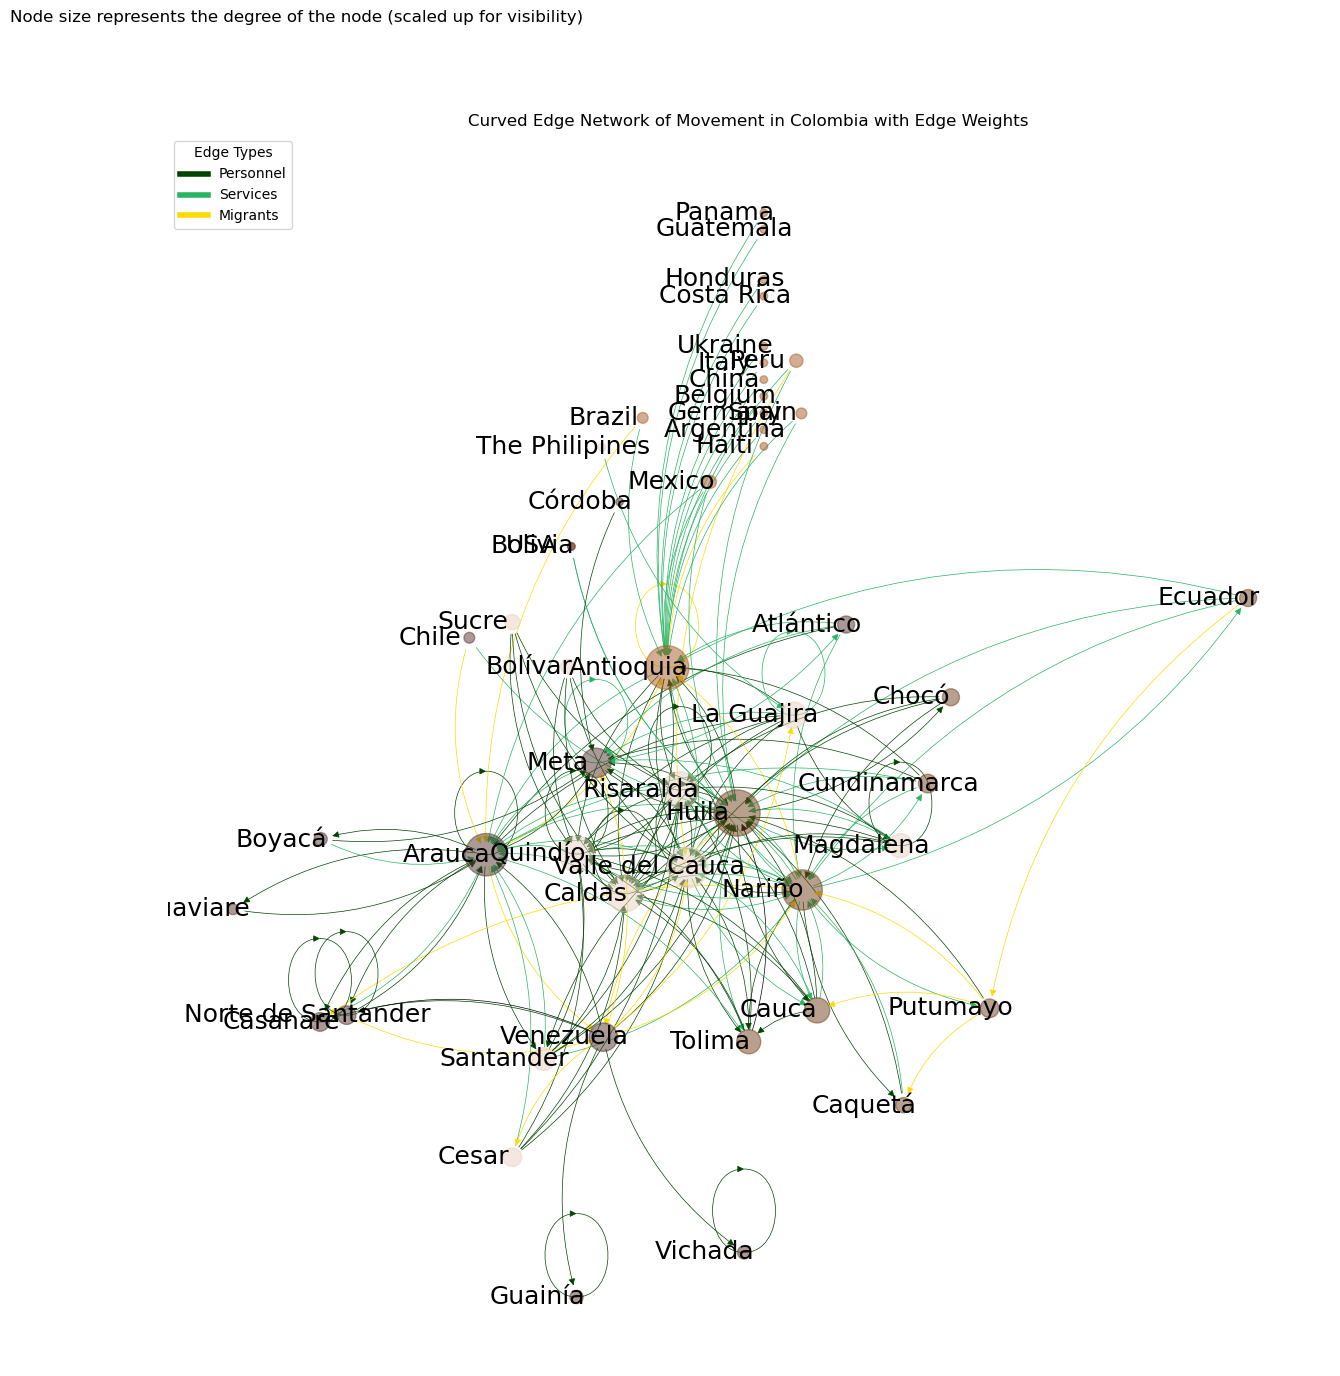

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as nx_comm
import numpy as np
from matplotlib.lines import Line2D

expanded_data['Value'] = expanded_data['Value'].replace({
    'P': 'Personnel',
    'S': 'Services',
    'M': 'Migrants'
})


# Define edge colors with updated labels
edge_color_map = {
    'Personnel': "#004400",
    'Services': "#28B463",
    'Migrants': "#FFDA00"
}


# Create the network using expanded_data
binary_network = nx.DiGraph()

# Add nodes and edges to the graph with the correct attributes and weights
for index, row in expanded_data.iterrows():
    # Calculate the weight for each edge
    edge_weight = 10
    # Check if edge_weight is NaN and assign a small value if true
    if np.isnan(edge_weight):
        edge_weight = 10  # Assign a default small value to NaN weights
    binary_network.add_edge(row['From'], row['To'], value=row['Value'], weight=edge_weight)

# Calculate the layout after all nodes and edges have been added
pos_kamada_kawai = nx.kamada_kawai_layout(binary_network)
# List of countries to adjust
countries = ['Haiti', 'Argentina', 'Germany', 'Belgium', 'China', 'Italy', 
             'Ukraine', 'Spain', 'Mexico', 'Costa Rica', 'Honduras', 'Brazil', 
             'Peru', 'Guatemala', 'Panama', 'Ecuador']

# Initial offset values
right_offset = 0.4
up_offset = 0.03

# Adjust positions for each country
for country in countries:
    if country in pos_kamada_kawai:
        pos_kamada_kawai[country] = (pos_kamada_kawai[country][0] + right_offset, 
                                     pos_kamada_kawai[country][1] + up_offset)

        # Increase the offset for the next country
        up_offset += 0.03
    
    
if 'The Filipines' in pos_kamada_kawai:
    pos_kamada_kawai['The Filipines'] = (pos_kamada_kawai['The Filipines'][0] +0.46, pos_kamada_kawai['The Filipines'][1] - 0.25)
if 'Boyacá' in pos_kamada_kawai:
    pos_kamada_kawai['Boyacá'] = (pos_kamada_kawai['Boyacá'][0] + 0.09, pos_kamada_kawai['Boyacá'][1] - 0.05)
if 'Córdoba' in pos_kamada_kawai:
    pos_kamada_kawai['Córdoba'] = (pos_kamada_kawai['Córdoba'][0] + 0.3, pos_kamada_kawai['Córdoba'][1] - 0.07)
if 'Santander' in pos_kamada_kawai:
    pos_kamada_kawai['Santander'] = (pos_kamada_kawai['Santander'][0] - 0.05, pos_kamada_kawai['Santander'][1] - 0.1)
if 'Bolívar' in pos_kamada_kawai:
    pos_kamada_kawai['Bolívar'] = (pos_kamada_kawai['Bolívar'][0] + 0.1, pos_kamada_kawai['Bolívar'][1] - 0.08)
if 'Tolima' in pos_kamada_kawai:
    pos_kamada_kawai['Tolima'] = (pos_kamada_kawai['Tolima'][0] + 0.08, pos_kamada_kawai['Tolima'][1] - 0.0)
if 'Casanare' in pos_kamada_kawai:
    pos_kamada_kawai['Casanare'] = (pos_kamada_kawai['Casanare'][0] - 0.2, pos_kamada_kawai['Casanare'][1] + 0.08)
if 'Vichada' in pos_kamada_kawai:
    pos_kamada_kawai['Vichada'] = (pos_kamada_kawai['Vichada'][0] + 0.3, pos_kamada_kawai['Vichada'][1] + 0.08)

    
    
    

# Use NetworkX's built-in algorithms for community detection
communities = nx_comm.greedy_modularity_communities(binary_network)

# Create a mapping of node to community index
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# Draw the network with curved edges
fig, ax = plt.subplots(figsize=(15, 16))

# Calculate node sizes based on degrees and make them 10 times bigger
node_degrees = dict(binary_network.degree())
node_sizes = [v * 100 for v in node_degrees.values()]  # Scale node size by degree





# Community colors as specified
community_colors_specified = ['#A95C26', '#543733', '#EAD0C1', '#74421F']
# Assigning colors to nodes based on their community
community_colors = [community_colors_specified[community_map[node] % len(community_colors_specified)] for node in binary_network.nodes()]


# Optionally, reduce the node sizes slightly if they are too large
scaled_node_sizes = [size * 0.3 for size in node_sizes]  # Scale down if needed
nx.draw_networkx_nodes(binary_network, pos=pos_kamada_kawai, node_size=scaled_node_sizes, node_color=community_colors, ax=ax, alpha=0.50)

# Draw curved edges with weights
for u, v in binary_network.edges():
    # Adjust the edge width based on the weight
    edge_width = binary_network[u][v]['weight'] * 0.05  # Scale the weight for visualization purposes
    # Adjust the rad value for better visibility of arrows
    nx.draw_networkx_edges(binary_network, pos=pos_kamada_kawai, edgelist=[(u, v)], width=edge_width, edge_color=edge_color_map.get(binary_network[u][v]['value'], 'black'), ax=ax, arrows=True, connectionstyle='arc3,rad=0.2')  # Increase rad for more curvature

# Adjust the position of the labels
label_pos = {node: (pos[0] - 0.07, pos[1]) for node, pos in pos_kamada_kawai.items()}
nx.draw_networkx_labels(binary_network, pos=label_pos, ax=ax, font_size=18)

# Assuming community_map is a dictionary mapping node labels to community indices
# and community_colors_specified is a list with colors for each community

# First, create a dictionary that maps nodes to their respective colors
node_color_map = {node: community_colors_specified[community_map[node] % len(community_colors_specified)] for node in binary_network.nodes()}

# Now, convert this dictionary to a pandas DataFrame
node_colors_df = pd.DataFrame(list(node_color_map.items()), columns=['Node Label', 'Color'])

# Display the first few rows to check
print(node_colors_df.head())  # Corrected line

# Create custom legend for edge colors
legend_elements = [Line2D([0], [0], color=color, lw=4, label=label) for label, color in edge_color_map.items()]
ax.legend(handles=legend_elements, title="Edge Types", loc='upper left')

# Annotate for node sizes and edge weights
plt.figtext(0.02, 0.95, "Node size represents the degree of the node (scaled up for visibility)", wrap=True, horizontalalignment='left', fontsize=12)
plt.title("Curved Edge Network of Movement in Colombia with Edge Weights")
plt.axis('off')
plt.show()

In [19]:
import pandas as pd

# Assuming community_map is a dictionary mapping node labels to community indices
# and community_colors_specified is a list with colors for each community

# First, create a dictionary that maps nodes to their respective colors
node_color_map = {node: community_colors_specified[community_map[node] % len(community_colors_specified)] for node in binary_network.nodes()}

# Now, convert this dictionary to a pandas DataFrame
node_colors_df = pd.DataFrame(list(node_color_map.items()), columns=['Node Label', 'Color'])

# Display the first few rows to check
print(node_colors_df)
node_colors_df['Color'].unique()

            Node Label    Color
0            Antioquia  #A95C26
1               Arauca  #543733
2            Atlántico  #543733
3               Caldas  #EAD0C1
4         Cundinamarca  #74421F
5                Huila  #74421F
6           La Guajira  #EAD0C1
7               Nariño  #74421F
8      Valle del Cauca  #EAD0C1
9                Haiti  #A95C26
10           Argentina  #A95C26
11                Peru  #A95C26
12             Germany  #A95C26
13             Belgium  #A95C26
14               China  #A95C26
15               Italy  #A95C26
16             Ukraine  #A95C26
17               Spain  #A95C26
18              Mexico  #A95C26
19          Costa Rica  #A95C26
20            Honduras  #A95C26
21              Brazil  #A95C26
22           Guatemala  #A95C26
23              Panama  #A95C26
24             Ecuador  #74421F
25              Boyacá  #543733
26            Casanare  #543733
27               Cesar  #EAD0C1
28            Guaviare  #543733
29                Meta  #543733
30  Nort

array(['#A95C26', '#543733', '#EAD0C1', '#74421F'], dtype=object)

In [20]:
# Filtered and corrected dataset
data = {
    'Node Label': [
        'ANTIOQUIA', 'ARAUCA', 'ATLÁNTICO', 'CALDAS', 'CUNDINAMARCA', 'LA GUAJIRA', 'VALLE DEL CAUCA',
        'CESAR', 'NORTE DE SANTANDER', 'META', 'BOLÍVAR', 'CAUCA', 'HUILA', 'MAGDALENA', 'NARIÑO',
        'QUINDIO', 'RISARALDA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'CASANARE', 'GUAINÍA', 'BOYACÁ',
        'CÓRDOBA', 'CHOCÓ', 'VICHADA'
    ],
    'Color': [
        '#A95C26', '#74421F', '#EAD0C1', '#543733', '#EAD0C1', '#EAD0C1', '#543733',
        '#74421F', '#74421F', '#EAD0C1', '#543733', '#543733', '#543733', '#EAD0C1',
        '#543733', '#543733', '#543733', '#543733', '#543733', '#543733', '#74421F',
        '#74421F', '#EAD0C1', '#EAD0C1', '#543733', '#74421F'
    ]
}

# Note: Removed non-Colombian departments and adjusted names to match the given list.
df_filtered =pd.DataFrame(data)

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load your shapefile
gdf = gpd.read_file('MGN_DPTO_POLITICO.shp')

# Assuming df_filtered is already defined and contains corrected names and colors
# Example of df_filtered is provided in your setup

# Merge the GeoDataFrame with df_filtered to get the colors into gdf
gdf_merged = gdf.merge(df_filtered, left_on='DPTO_CNMBR', right_on='Node Label', how='left')

# Replace NaN colors with 'white' for departments not in df_filtered
gdf_merged['Color'] = gdf_merged['Color'].fillna('white')

# Plotting the map with assigned colors and black borders for departments
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf_merged.plot(ax=ax, color=gdf_merged['Color'], edgecolor='black')

plt.show()


ModuleNotFoundError: No module named 'geopandas'